# Non Linear Regression

Configure the project. Indeed you create a dataset in csv format.

In [183]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! mv gdp.csv data.csv

Archive:  ./dataset/archive.zip
  inflating: gdp.csv                 
  inflating: gdp_growth.csv          
  inflating: gdp_per_capita.csv      
  inflating: gdp_per_capita_growth.csv  
  inflating: gdp_ppp.csv             
  inflating: gdp_ppp_per_capita.csv  


Import needed libraries

In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

%matplotlib inline

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [185]:
df = pd.read_csv("data.csv")
# df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head(10)

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN
5,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10,NaN
6,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09,NaN,NaN
7,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.740553e+12,2.799579e+12,2.831681e+12,2.463580e+12,2.411981e+12,2.466443e+12,2.730780e+12,2.776469e+12,2.447584e+12,NaN
8,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11,4.172156e+11,3.588688e+11,NaN
9,Argentina,ARG,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,2.863047e+10,2.425667e+10,...,5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.248197e+11,4.519324e+11,3.892881e+11,NaN


### Extract the japan GDP from the table 

In [186]:
df = df.drop(df.columns[:2], axis=1)
df = df.iloc[[121]]
df = df.transpose()
df = df.reset_index()
df.columns = ['Year', "Japan's GDP"]
df.head(10)


,Year,Japan's GDP
0,1960,7.912655e+08
1,1961,7.929595e+08
2,1962,8.681114e+08
3,1963,9.265893e+08
4,1964,9.987593e+08
5,1965,9.979193e+08
6,1966,1.164520e+09
7,1967,1.232560e+09
8,1968,1.353295e+09
9,1969,1.458379e+09


In [187]:
df.tail(10)
df = df.drop(df.index[-1])
df.tail(10)


,Year,Japan's GDP
51,2011,4.686946e+10
52,2012,5.639671e+10
53,2013,6.167143e+10
54,2014,6.828577e+10
55,2015,7.012041e+10
56,2016,7.481512e+10
57,2017,8.203580e+10
58,2018,9.220296e+10
59,2019,1.005555e+11
60,2020,1.010137e+11


In [188]:
# summarize data
df.describe() 

,Japan's GDP
count,6.100000e+01
mean,2.029558e+10
std,2.728069e+10
min,7.912655e+08
25%,3.259345e+09
50%,8.151479e+09
75%,1.873790e+10
max,1.010137e+11


## Print Some histogram chart example

/tmp/ipykernel_78817/3080679515.py:60: RuntimeWarning: divide by zero encountered in divide
  y = 10/(5+x)


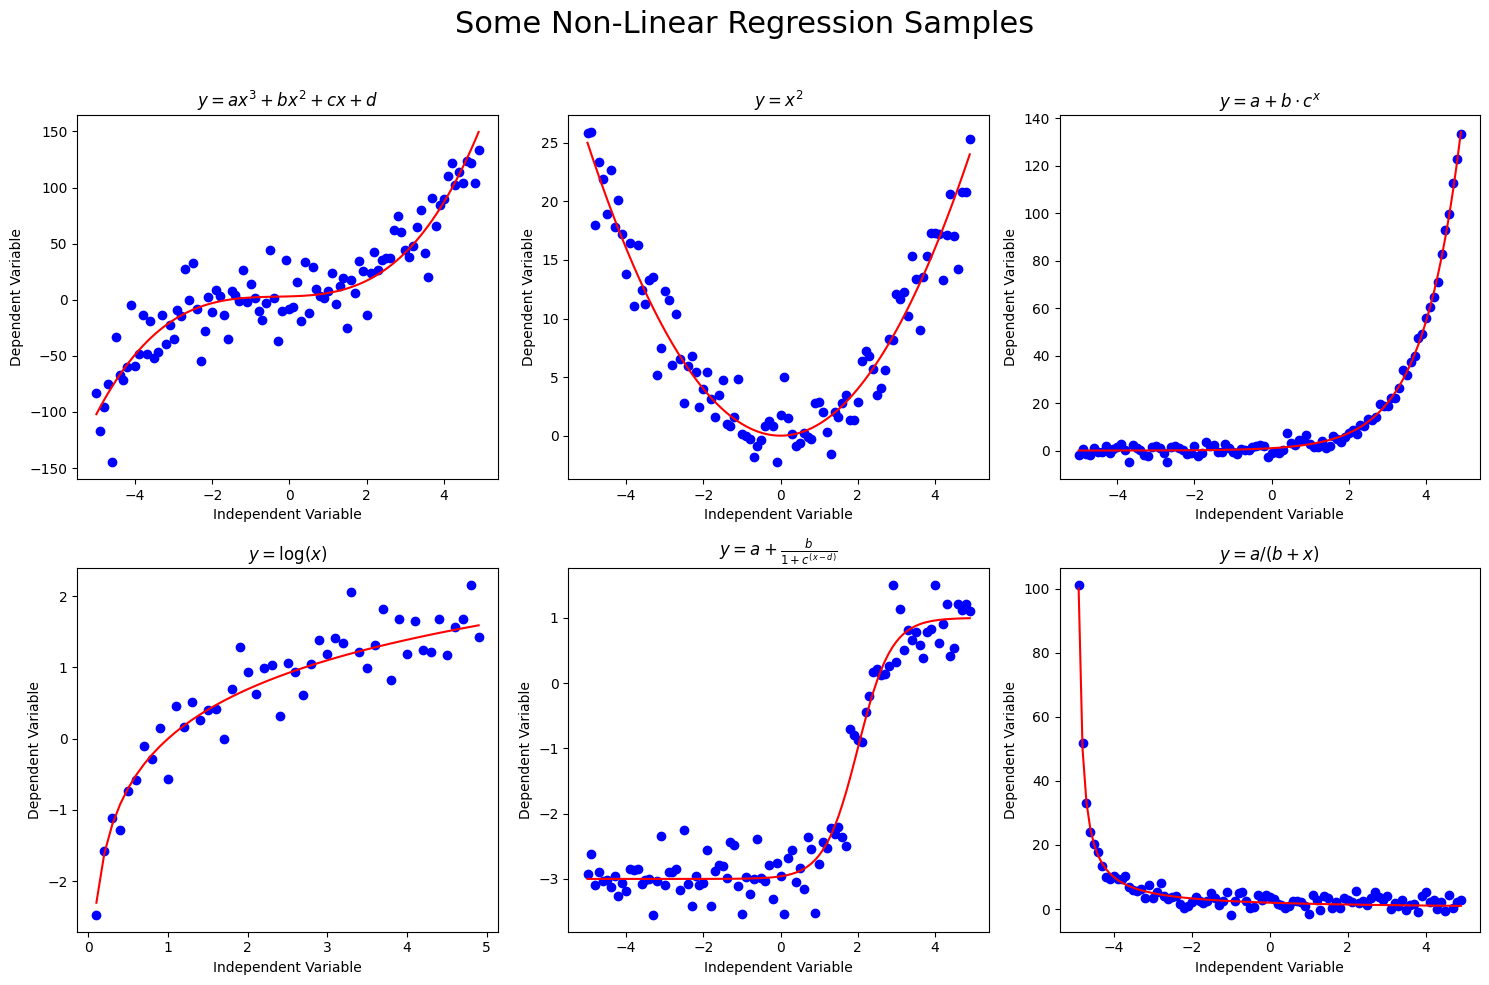

In [189]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Cubic with noise
x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
axs[0, 0].plot(x, ydata, 'bo')
axs[0, 0].plot(x, y, 'r')
axs[0, 0].set_title("$y = ax^3 + bx^2 + cx + d$")
axs[0, 0].set_xlabel('Independent Variable')
axs[0, 0].set_ylabel('Dependent Variable')

# Plot 2: Quadratic with noise
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x, 2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
axs[0, 1].plot(x, ydata, 'bo')
axs[0, 1].plot(x, y, 'r')
axs[0, 1].set_title("$y = x^2$")
axs[0, 1].set_xlabel('Independent Variable')
axs[0, 1].set_ylabel('Dependent Variable')

# Plot 3: Exponential with noise
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
axs[0, 2].plot(x, ydata, 'bo')
axs[0, 2].plot(x, y, 'r')
axs[0, 2].set_title("$y = a + b \cdot c^x$")
axs[0, 2].set_xlabel('Independent Variable')
axs[0, 2].set_ylabel('Dependent Variable')

# Plot 4: Logarithmic with noise
x = np.arange(0.1, 5.0, 0.1)  # logarithm is defined for x > 0
y = np.log(x)
y_noise = 0.3 * np.random.normal(size=x.size)
ydata = y + y_noise
axs[1, 0].plot(x, ydata, 'bo')
axs[1, 0].plot(x, y, 'r')
axs[1, 0].set_title("$y = \log(x)$")
axs[1, 0].set_xlabel('Independent Variable')
axs[1, 0].set_ylabel('Dependent Variable')

# Plot 5: Logistic with noise
x = np.arange(-5.0, 5.0, 0.1)
y = 1-4/(1+np.power(10, x-2))
y_noise = 0.3 * np.random.normal(size=x.size)
ydata = y + y_noise
axs[1, 1].plot(x, ydata, 'bo')
axs[1, 1].plot(x, y, 'r')
axs[1, 1].set_title("$y = a + \\frac{b}{1+c^{(x-d)}}$")
axs[1, 1].set_xlabel('Independent Variable')
axs[1, 1].set_ylabel('Dependent Variable')

# Plot 6: Hyperbolic with noise
x = np.arange(-5.0, 5.0, 0.1)
y = 10/(5+x)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
axs[1, 2].plot(x, ydata, 'bo')
axs[1, 2].plot(x, y, 'r')
axs[1, 2].set_title("$y = a / (b+x) $")
axs[1, 2].set_xlabel('Independent Variable')
axs[1, 2].set_ylabel('Dependent Variable')

fig.suptitle("Some Non-Linear Regression Samples", fontsize=22)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Print scatter chart of data to recognize the patterns of data.

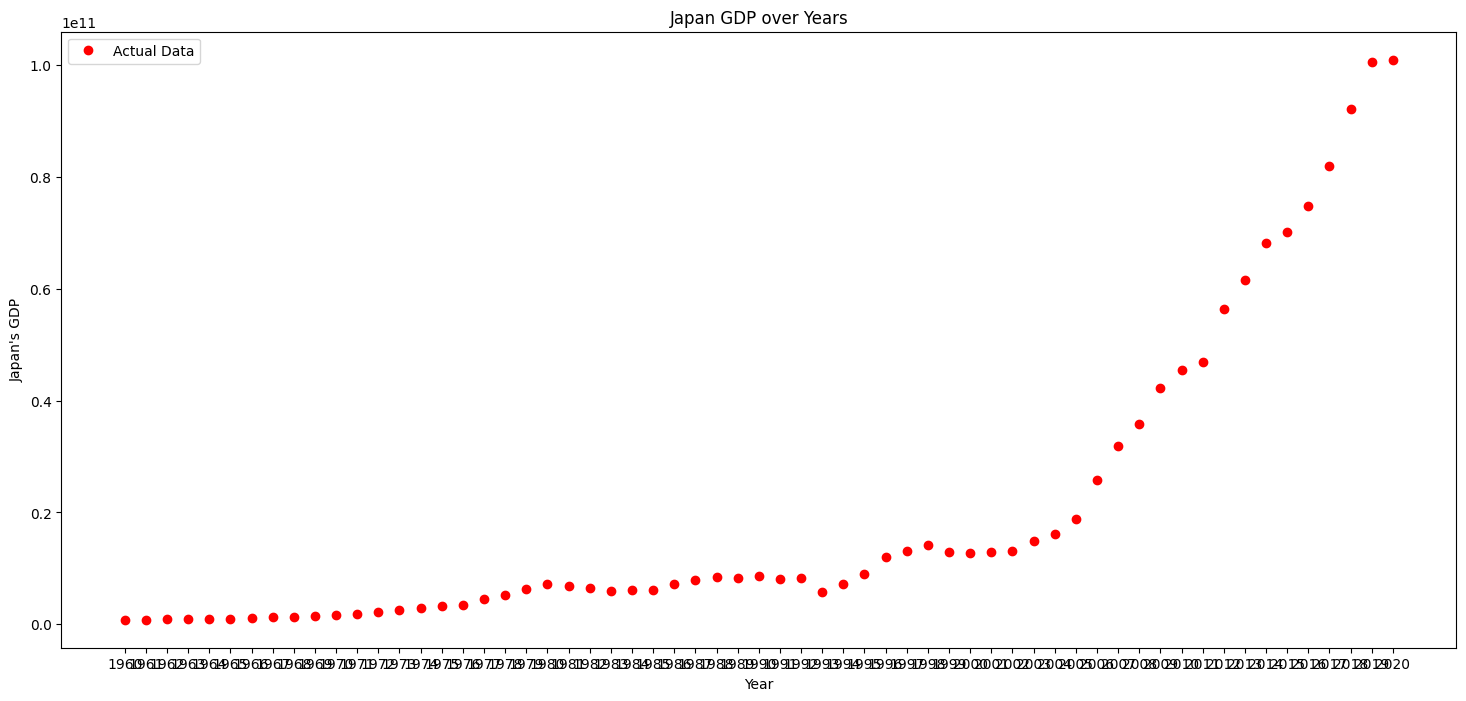

In [190]:
x_data, y_data = (df["Year"].values, df["Japan's GDP"].values)
plt.figure(figsize=(18, 8))  # Adjust the size as needed, e.g., (12, 8))
plt.plot(x_data, y_data, 'ro', label="Actual Data")

plt.xlabel('Year')
plt.ylabel("Japan's GDP")
plt.title('Japan GDP over Years')
plt.legend()
plt.show()

## Define sigmoid (S-curve) function

In [191]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

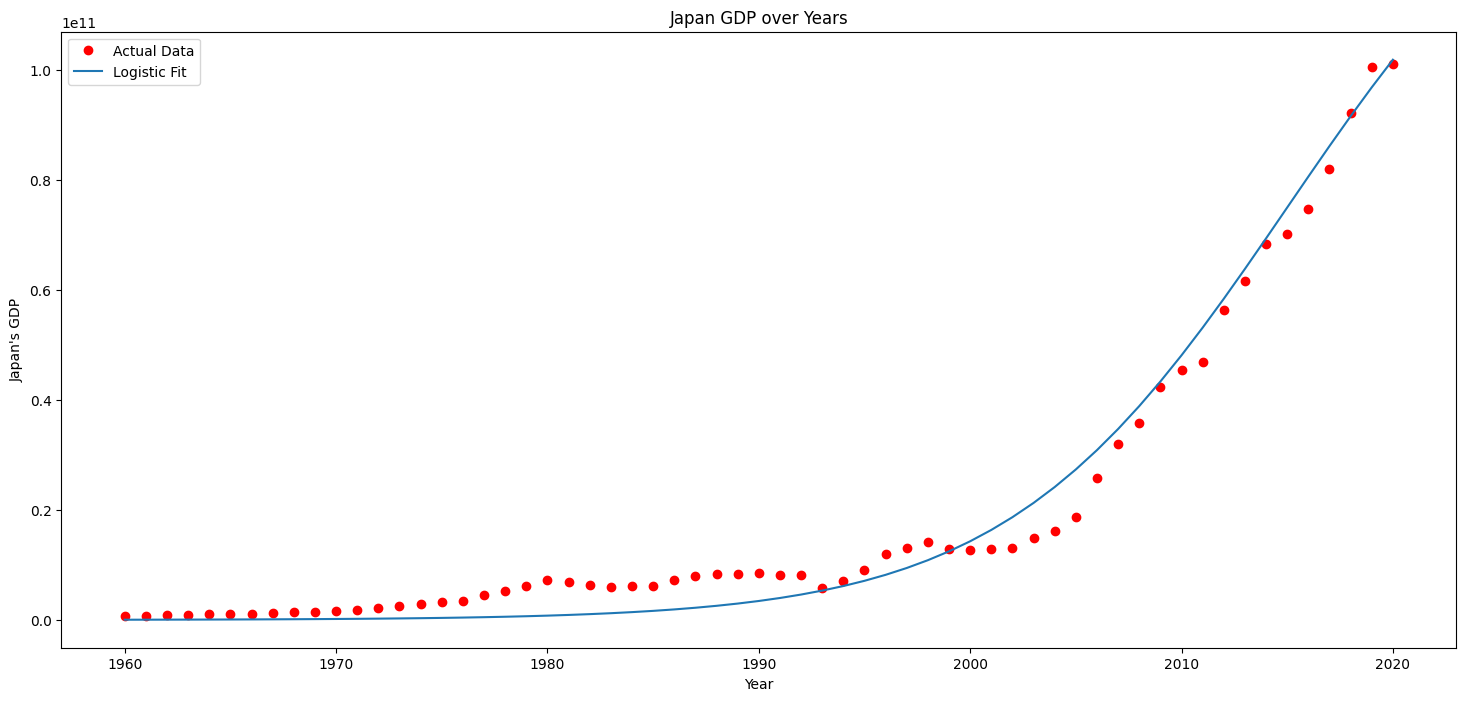

In [192]:
beta_1 = 0.15
beta_2 = 2015.0

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
x_data, y_data = (df["Year"].values, df["Japan's GDP"].values)

# Calculate predictions
Y_pred = sigmoid(df["Year"], beta_1, beta_2)

# Plot with a larger figure size
plt.figure(figsize=(18, 8))  # Adjust the size as needed, e.g., (12, 8))
plt.plot(x_data, y_data, 'ro', label="Actual Data")

# Plot the logistic function prediction
plt.plot(x_data, Y_pred * 150000000000., label="Logistic Fit")  # Adjust scaling factor as needed

plt.xlabel('Year')
plt.ylabel("Japan's GDP")
plt.title('Japan GDP over Years')
plt.legend()
plt.show()

## Split dataset into train and test parts

In [193]:
# print(df)
train, test = train_test_split(df, test_size=0.20, random_state=42)
# test, evaluate = train_test_split(test, test_size=0.5, random_state=42)

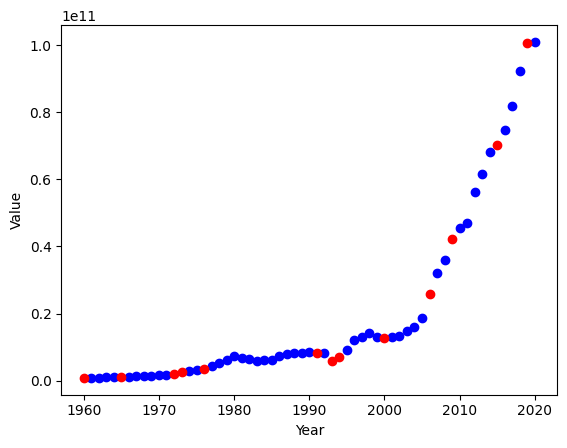

In [194]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(train.Year, train["Japan's GDP"], color="blue")
ax1.scatter(test.Year, test["Japan's GDP"], color="red")
plt.ylabel("Value")
plt.xlabel("Year")
plt.show()

## Data Normalization:

In [195]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

xdata

array([0.97029703, 0.97079208, 0.97128713, 0.97178218, 0.97227723,
       0.97277228, 0.97326733, 0.97376238, 0.97425743, 0.97475248,
       0.97524752, 0.97574257, 0.97623762, 0.97673267, 0.97722772,
       0.97772277, 0.97821782, 0.97871287, 0.97920792, 0.97970297,
       0.98019802, 0.98069307, 0.98118812, 0.98168317, 0.98217822,
       0.98267327, 0.98316832, 0.98366337, 0.98415842, 0.98465347,
       0.98514851, 0.98564356, 0.98613861, 0.98663366, 0.98712871,
       0.98762376, 0.98811881, 0.98861386, 0.98910891, 0.98960396,
       0.99009901, 0.99059406, 0.99108911, 0.99158416, 0.99207921,
       0.99257426, 0.99306931, 0.99356436, 0.99405941, 0.99455446,
       0.9950495 , 0.99554455, 0.9960396 , 0.99653465, 0.9970297 ,
       0.99752475, 0.9980198 , 0.99851485, 0.9990099 , 0.99950495,
       1.        ])

In [196]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 430.034235, beta_2 = 0.995297


## Draw fitted sigmoid diagram based on data 

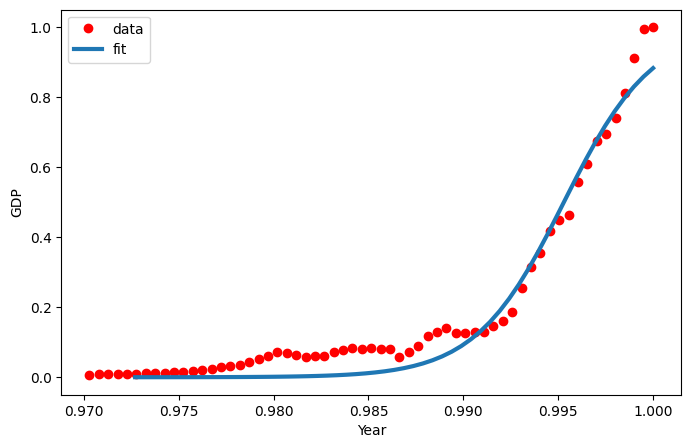

In [197]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Testing model based on Test data. Measure the R2 and MSE.

In [169]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set

print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

beta_1 = 430.034235, beta_2 = 0.995297
Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.96
